<a href="https://colab.research.google.com/github/Janjre/Janjre/blob/main/NeuralNetworkTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports library used for networking

In [ ]:
!pip install tensorflow

Set up neural network, make training data and train

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define input and output dimensions
input_neurons = 5
output_neurons = 5
hidden_neurons = 5

# Define the model
model = keras.Sequential([
    layers.InputLayer(input_shape=(input_neurons,)),
    layers.Dense(hidden_neurons, activation='relu'),
    layers.Dense(output_neurons, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate larger and more diverse training data
def generate_data(samples):
    inputs = []
    outputs = []

    for _ in range(samples):
        # Generate 5 random values between 0 and 1
        values = np.random.rand(input_neurons)

        # Randomly pick one value to be the largest by adding 1 to it
        largest_index = np.random.randint(0, input_neurons)
        values[largest_index] += 1

        # Normalize values (optional, but helps with training)
        values = values / np.sum(values)

        # One-hot encode the output: the index of the largest value should have the highest output
        output = np.zeros(output_neurons)
        output[largest_index] = 1

        inputs.append(values)
        outputs.append(output)

    return np.array(inputs), np.array(outputs)

# Generate 1000 diverse samples
train_inputs, train_outputs = generate_data(1000)

# Train the model
model.fit(train_inputs, train_outputs, epochs=500)






Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1511 - loss: 1.6846
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1756 - loss: 1.6488 
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2172 - loss: 1.6140
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1936 - loss: 1.5972 
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2447 - loss: 1.5770 
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3453 - loss: 1.5576 
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3991 - loss: 1.5396 
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4336 - loss: 1.5193
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 1.5044 
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4946 - loss: 1.4958 
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 1.4701
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.54

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions: [[1.0000000e+00 1.5493624e-11 2.1500426e-15 9.1666749e-18 2.3166172e-13]]


Test the network

In [ ]:
test_input = np.array([[float(input("1")), float(input("2")), float(input("3")), float(input("4")), float(input("5"))]])
predictions = model.predict(test_input)

predictions = np.round(predictions, 2)
print(predictions)


Predictions: [[1. 0. 0. 0. 0.]]


Visulalise weights and biases below

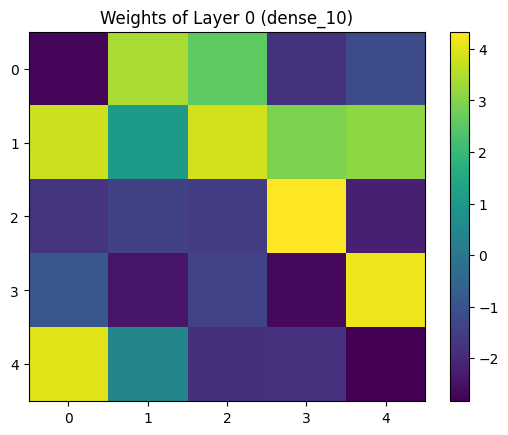

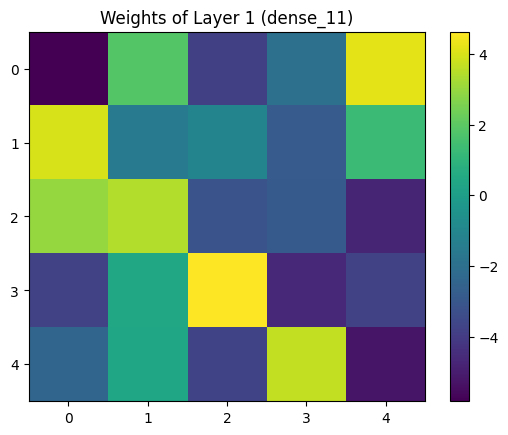

In [ ]:
import matplotlib.pyplot as plt

# Loop through all layers and plot weights
for i, layer in enumerate(model.layers):
    # Get weights and biases (we'll only use the weights)
    weights, _ = layer.get_weights()  # We ignore the biases

    # Check if the layer has weights
    if weights is not None and len(weights) > 0:
        # Visualize the weights as a heatmap
        plt.imshow(weights, cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.title(f'Weights of Layer {i} ({layer.name})')
        plt.show()


10.1
20.2
30.1
40.8
50.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0. 0. 0. 1. 0.]]
